In [ ]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib ipympl
using_colab = True
if using_colab:

    import torch
    import torchvision
    import numpy as np
    import torch
    import matplotlib.pyplot as plt
    import cv2
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'



    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

    from google.colab import drive
    drive.mount('/content/drive')
    !nvidia-smi

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

import matplotlib.image as mpimg
%matplotlib ipympl

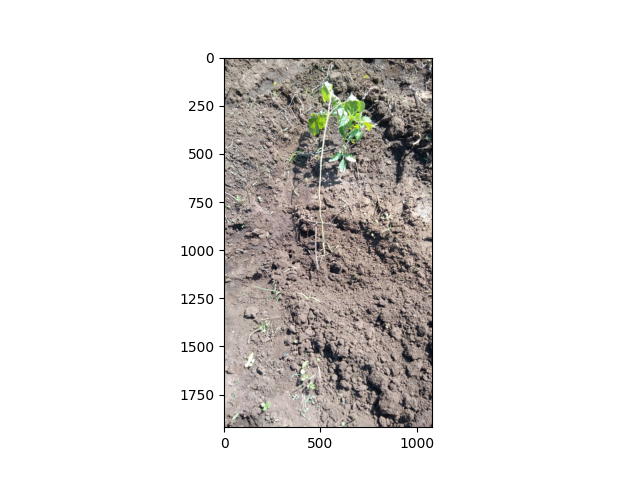

In [ ]:
import matplotlib.image as mpimg
path = "/content/drive/MyDrive/eastafrica2.jpg"
class TestClass():

    def __init__(self):
        self.fname = path
        self.img = mpimg.imread(self.fname)
        self.point = ()
        self.clicks = []

    def getCoord(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.imshow(self.img)
        cid = fig.canvas.mpl_connect('button_press_event', self.__onclick__)
        plt.show()
        return self.point

    def __onclick__(self,click):
        self.point = (click.xdata,click.ydata)
        self.clicks.append([click.xdata,click.ydata])
        return self.point

    def getlist(self):
        return self.clicks
a = TestClass()
a.getCoord()
b = a.getlist()

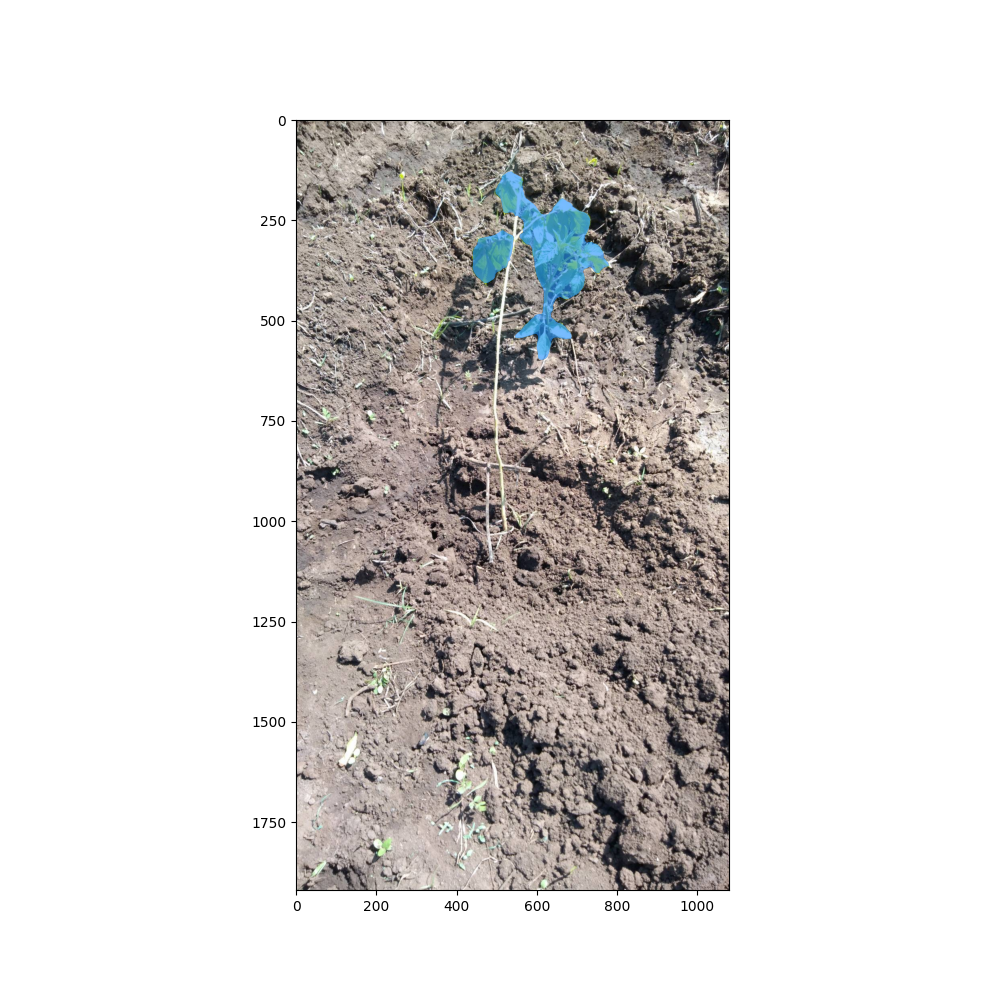

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

image = mpimg.imread(path)
image = image.astype(np.uint8)


input_point = []
for i in b:
  input_point.append([int(i[0]), int(i[1])])

input_label = []
for i in input_point:
  input_label.append(1)
input_point = np.array(input_point)
input_label = np.array(input_label)
predictor = SamPredictor(sam)
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

mask_input = logits[np.argmax(scores), :, :]
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
    return_logits= False,
)

plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks, plt.gca())
#show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

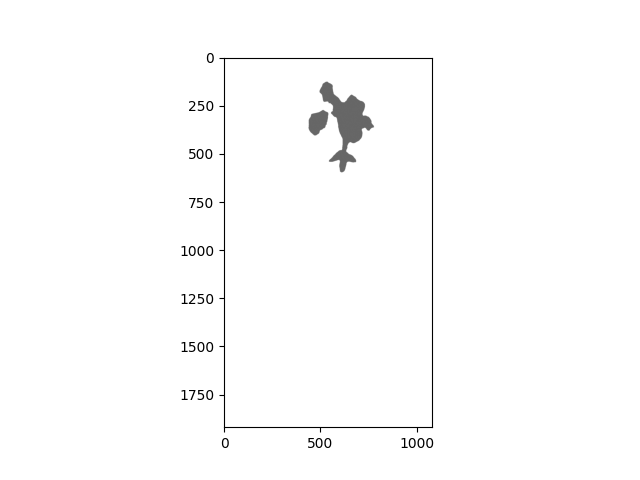

In [ ]:
def show_mask(mask, ax):
    color = np.array([0, 0, 0, 0.6])  # Black color with 0.6 opacity
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image, cmap='gray')  # Display as grayscale

# Example usage:
# Assuming you have a binary mask stored in the 'my_mask' variable
fig, ax = plt.subplots()
show_mask(masks, ax)
plt.show()








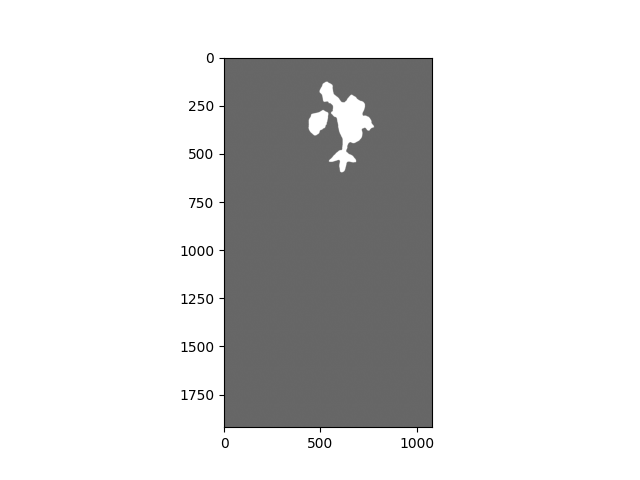

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_mask(mask, ax):
    inverted_mask = 1 - mask  # Invert the mask (0 becomes 1, and 1 becomes 0)
    color = np.array([0, 0, 0, 0.6])  # Black color with 0.6 opacity
    h, w = inverted_mask.shape[-2:]
    mask_image = inverted_mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# Example usage:
# Assuming you have a binary mask stored in the 'my_mask' variable
fig, ax = plt.subplots()
show_mask(masks, ax)
plt.show()


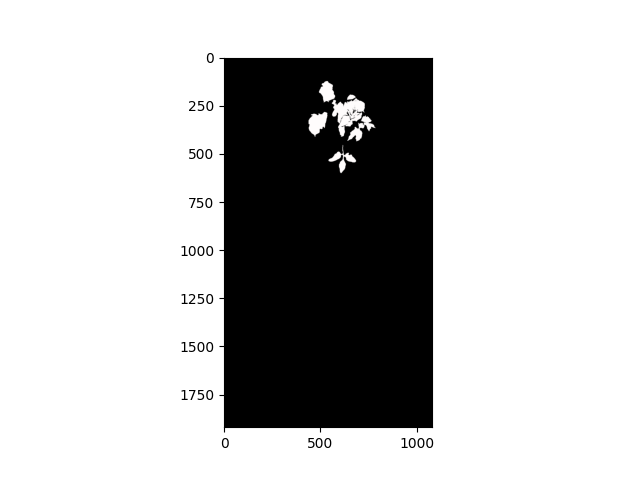

In [ ]:
plt.figure()
my_img = cv2.imread('/content/drive/MyDrive/eastafrica2.png')
plt.imshow(my_img)
plt.show()

In [ ]:
import cv2
import numpy as np

img_path = '/content/drive/MyDrive/eastafrica2.png'
img = cv2.imread(img_path, 0)

img_reverted= cv2.bitwise_not(img)

new_img = img_reverted / 255.0


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

my_img = cv2.imread('/content/drive/MyDrive/eastafrica2.png')
inverted_img = cv2.bitwise_not(my_img)  # Invert the colors
final = inverted_img / 255.0


In [ ]:
for i in range(len(new_img)):
  for j in range(len(new_img[0])):
    if new_img[i][j] == 1:
      new_img[i][j] = 0
    else:
      new_img[i][j]= 1

In [ ]:
print(final)
print(masks)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]


In [ ]:
print(len(final),len(final[0]))
print(type(masks[0]),len(masks[0][0]))
final = final[:, :, 0]

print((masks[0].shape))
print(final.shape)


1920 1080
<class 'numpy.ndarray'> 1080
(1920, 1080)
(1920, 1080)


In [ ]:

import numpy as np

# Assuming you have two binary masks as numpy arrays, mask1 and mask2
mask1 = masks[0]
mask2 = final
# Step 1: Compute the intersection area
intersection = np.logical_and(mask1, mask2)

# Step 2: Compute the union area
union = np.logical_or(mask1, mask2)

# Step 3: Calculate IoU
iou = np.sum(intersection) / np.sum(union)

print("Intersection over Union (IoU):", iou)

Intersection over Union (IoU): 0.0


In [ ]:
    def calculateIoU(gtMask, predMask):
        # Calculate the true positives,
        # false positives, and false negatives
        tp = 0
        fp = 0
        fn = 0

        for i in range(len(gtMask)):
            for j in range(len(gtMask[0])):
                if gtMask[i][j].any() == 1 and predMask[i][j].any() == 1:
                    tp += 1
                elif gtMask[i][j].any() == 0 and predMask[i][j].any() == 1:
                    fp += 1
                elif gtMask[i][j].any() == 1 and predMask[i][j].any() == 0:
                    fn += 1

        # Calculate IoU
        iou = tp / (tp + fp + fn)

        return iou

In [ ]:
i = 78
j = 1
print(masks[0][i][j])
print(new_img[i][j])

False
0.0


In [ ]:
print(calculateIoU(masks[0],new_img))

0.7338858195211786


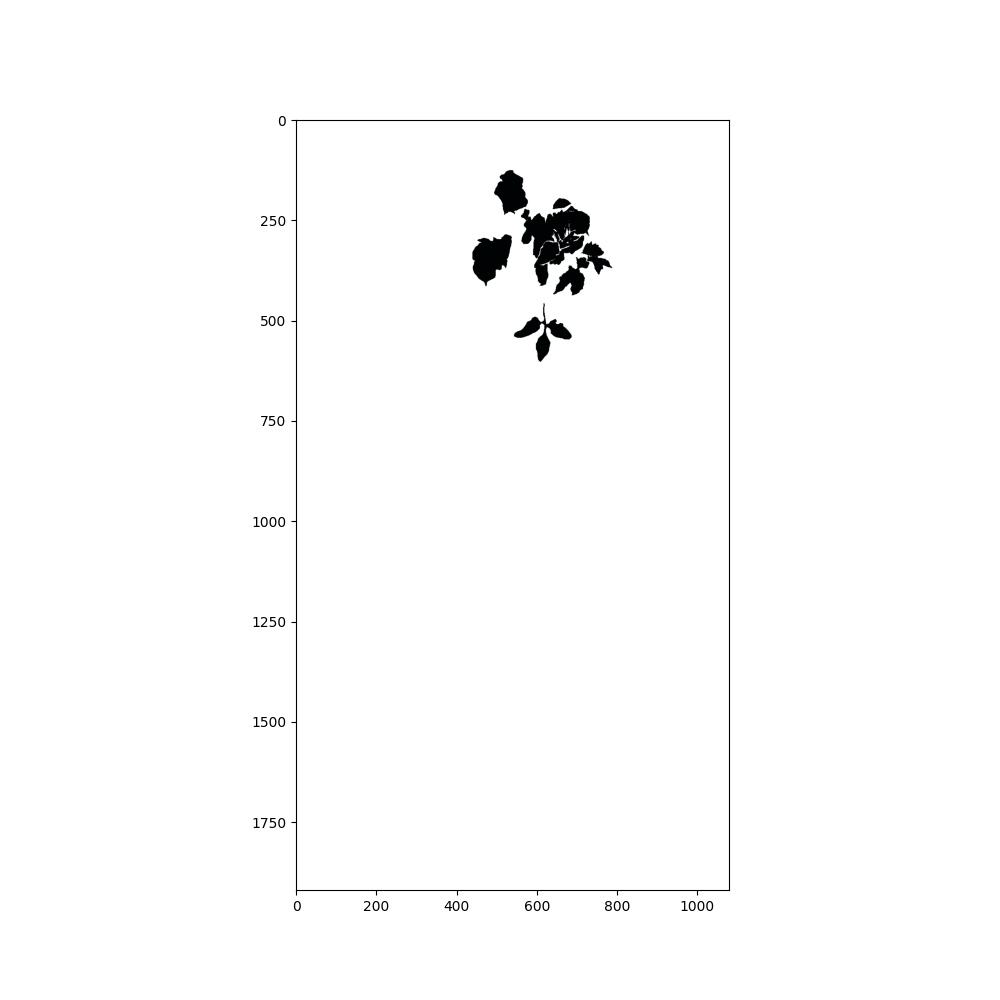

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

my_img = cv2.imread('/content/drive/MyDrive/eastafrica2.png')
inverted_img = (255.0 - my_img)
final = inverted_img / 255.0

# Visualize the result
plt.imshow(final)
plt.show()
print(final)

In [ ]:
for i in range(len(masks[0])):
  for j in range(len(masks[0][0])):
    if masks[0][i][j].any() != new_img.any():
      print(i,j)
      break
    else:
      continue

In [ ]:
print(calculateIoU(masks[0],new_img ))

0.0


In [ ]:
def bm0(mask1, mask2):
    mask1_area = np.count_nonzero(mask1 == 1)       # I assume this is faster as mask1 == 1 is a bool array
    mask2_area = np.count_nonzero(mask2 == 1)
    intersection = np.count_nonzero( np.logical_and( mask1, mask2) )
    iou = intersection/(mask1_area+mask2_area-intersection)
    return iou
def iou(mask1, mask2):
    intersection = (mask1 * mask2).sum()
    if intersection == 0:
        return 0.0
    union = torch.logical_or(mask1, mask2).to(torch.int).sum()
    return intersection / union


print(bm0(masks[0],new_img))

1.0216257921097933


In [ ]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import supervision as sv
sv.plot_image(masks[0], (16, 16))

In [ ]:
    array = np.reshape(masks[0], (1024, 720))

    # show the shape of the array
    print(array.shape)

    # show the array
    print(array)

In [ ]:
threshold = 180
binary_image = (masks[0] > threshold).astype(np.uint8) * 255
# Assuming 'binary_image' is your binary numpy.ndarray
binary_image_pil = Image.fromarray(binary_image)

# Show the image using the default image viewer
binary_image_pil.show()

In [ ]:
from PIL import Image
import numpy as np
def draw_mask(mask, image, random_color=True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.8])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])

    h, w = mask.shape  # Get the height and width of the mask
    mask_image = (mask[:, :, np.newaxis] * color[np.newaxis, np.newaxis, :]).astype(np.uint8)

    # Convert the original image to RGBA format
    annotated_frame_pil = Image.fromarray(image).convert("RGBA")

    # Convert the mask image to RGBA format
    mask_image_pil = Image.fromarray(mask_image).convert("RGBA")

    # Overlay the mask image on the original image
    return np.array(Image.alpha_composite(annotated_frame_pil, mask_image_pil))

output = draw_mask(masks[0],image)
show_mask(output, plt.gca())